In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import wrangle_zillow

## Acquire and Summarize

### EXERCISE ONE
Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = wrangle_zillow.acquire_cache_zillow()

The `acquire_cache_zillow` function achieves the goals of exercise one through the following query:

```
SELECT prop.*, logerror, transactiondate, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, propertylandusedesc, storydesc, typeconstructiondesc
FROM properties_2017 as prop 
INNER JOIN (
	SELECT id, p.parcelid, logerror, transactiondate
	FROM predictions_2017 AS p
	INNER JOIN (
		SELECT parcelid,  MAX(transactiondate) AS max_date
		FROM predictions_2017 
		GROUP BY (parcelid)) AS sub
			ON p.parcelid = sub.parcelid
		WHERE p.transactiondate = sub.max_date
		) AS subq
	ON prop.parcelid = subq.parcelid
LEFT JOIN airconditioningtype
	ON prop.airconditioningtypeid = airconditioningtype.airconditioningtypeid
LEFT JOIN architecturalstyletype
	ON prop.architecturalstyletypeid = architecturalstyletype.architecturalstyletypeid
LEFT JOIN buildingclasstype 
	ON prop.buildingclasstypeid = buildingclasstype.buildingclasstypeid
LEFT JOIN heatingorsystemtype
	ON prop.heatingorsystemtypeid = heatingorsystemtype.heatingorsystemtypeid
LEFT JOIN propertylandusetype
	ON prop.propertylandusetypeid = propertylandusetype.propertylandusetypeid
LEFT JOIN storytype
	ON prop.storytypeid = storytype.storytypeid
LEFT JOIN typeconstructiontype
	ON prop.typeconstructiontypeid = typeconstructiontype.typeconstructiontypeid
WHERE latitude IS NOT NULL 
	AND longitude IS NOT NULL
	AND transactiondate BETWEEN '2017-01-01' AND '2017-12-31';
```

In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


### EXERCISE TWO
Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738000e+04,7.738000e+04,24953.000000,206.000000,50.000000,77380.000000,77380.000000,15.000000,49671.000000,76771.000000,...,17560.000000,172.0,7.726800e+04,7.737900e+04,77380.0,7.737800e+04,77375.000000,2886.000000,7.713600e+04,77380.000000
mean,1.495126e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299134,3.053489,3.933333,6.534638,2.316871,...,1.434738,1.0,1.893160e+05,4.901375e+05,2016.0,3.010969e+05,5995.566592,14.087318,6.049674e+13,0.016628
std,8.609057e+05,3.481368e+06,2.967894,2.734542,689.703546,0.996657,1.139103,0.258199,1.721933,0.979761,...,0.544569,0.0,2.300886e+05,6.534477e+05,0.0,4.925990e+05,7622.887460,2.185663,1.535252e+12,0.170190
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520500e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.585000,14.000000,6.037311e+13,-0.024377
50%,1.497870e+06,1.253155e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,1.364995e+05,3.589760e+05,2016.0,2.033835e+05,4450.720000,15.000000,6.037603e+13,0.006627
75%,2.240480e+06,1.421184e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,...,2.000000,1.0,2.187875e+05,5.690030e+05,2016.0,3.668022e+05,6927.800000,15.000000,6.059042e+13,0.039204
max,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [6]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [7]:
df.shape

(77380, 68)

In [8]:
columns = df.columns.to_list()

In [9]:
for col in columns:
    print(col.upper())
    print('\n')
    print(df[col].value_counts())
    print('\n')

ID


657407     1
2052799    1
2132676    1
1499003    1
2267846    1
          ..
2069784    1
1285401    1
2592027    1
2604317    1
2392597    1
Name: id, Length: 77380, dtype: int64


PARCELID


12086286    1
13842812    1
17089101    1
14604878    1
11149905    1
           ..
13926436    1
10832543    1
11078987    1
11089228    1
14298875    1
Name: parcelid, Length: 77380, dtype: int64


AIRCONDITIONINGTYPEID


1.0     23133
13.0     1574
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64


ARCHITECTURALSTYLETYPEID


7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64


BASEMENTSQFT


700.0     2
515.0     2
900.0     2
912.0     2
640.0     2
273.0     2
100.0     2
3560.0    1
669.0     1
252.0     1
405.0     1
674.0     1
600.0     1
394.0     1
396.0     1
819.0     1
786.0     1
3112.0    1
1809.0    1
645.0     1
512.0     1
204.0     1
168.0     1
380.0     1
352.0     1
254.0     1
28

97319.0    825
96987.0    753
97318.0    708
97118.0    613
96974.0    593
          ... 
96039.0      2
97088.0      1
97092.0      1
97111.0      1
96467.0      1
Name: regionidzip, Length: 389, dtype: int64


ROOMCNT


0.0     59807
6.0      4513
7.0      3838
5.0      3016
8.0      2872
4.0      1415
9.0      1193
10.0      339
3.0       211
11.0      108
12.0       35
2.0        15
13.0       10
14.0        6
15.0        1
1.0         1
Name: roomcnt, dtype: int64


STORYTYPEID


7.0    50
Name: storytypeid, dtype: int64


THREEQUARTERBATHNBR


1.0    10012
2.0       75
3.0        8
7.0        1
Name: threequarterbathnbr, dtype: int64


TYPECONSTRUCTIONTYPEID


6.0     219
4.0       1
13.0      1
10.0      1
Name: typeconstructiontypeid, dtype: int64


UNITCNT


1.0      47292
2.0       2018
4.0        723
3.0        525
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64


YARDBUILDINGSQFT17


200.0    103
240.0     76
300.0     50
180.0     42

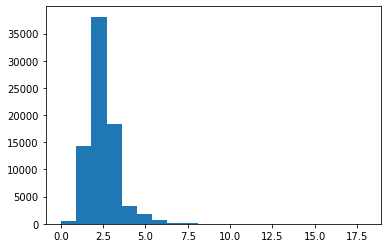

In [10]:
plt.hist(df.bathroomcnt, bins = 20)
plt.show()

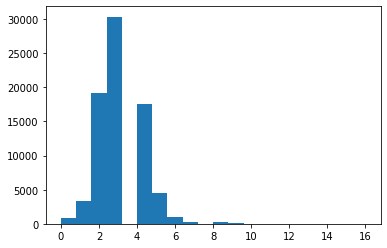

In [11]:
plt.hist(df.bedroomcnt, bins=20)
plt.show()

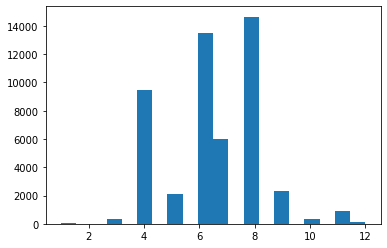

In [12]:
plt.hist(df.buildingqualitytypeid, bins=20)
plt.show()

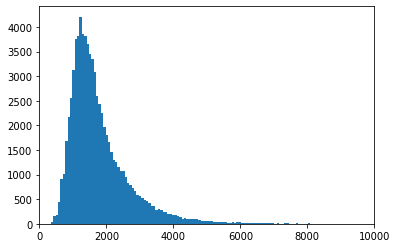

In [13]:
plt.hist(df.calculatedfinishedsquarefeet, bins = 500)
plt.xlim(0, 10000)
plt.show()

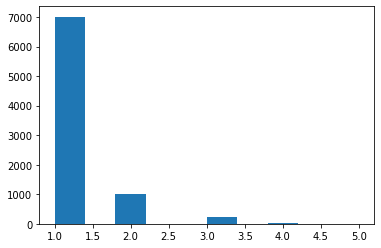

In [14]:
plt.hist(df.fireplacecnt)
plt.show()

(array([1.4310e+04, 3.8096e+04, 1.8351e+04, 4.0480e+03, 1.2450e+03,
        4.5400e+02, 0.0000e+00, 1.2100e+02, 1.1100e+02, 2.3000e+01,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.85,  2.7 ,  3.55,  4.4 ,  5.25,  6.1 ,  6.95,  7.8 ,
         8.65,  9.5 , 10.35, 11.2 , 12.05, 12.9 , 13.75, 14.6 , 15.45,
        16.3 , 17.15, 18.  ]),
 <a list of 20 Patch objects>)

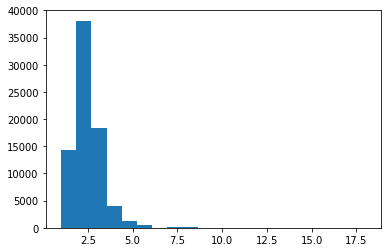

In [15]:
plt.hist(df.fullbathcnt, bins = 20)

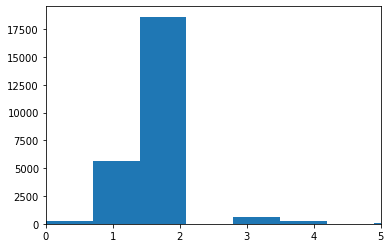

In [16]:
plt.hist(df.garagecarcnt, bins = 20)
plt.xlim(0,5)
plt.show()

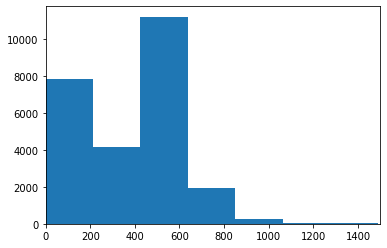

In [17]:
plt.hist(df.garagetotalsqft, bins = 20)
plt.xlim(0, 1500)
plt.show()

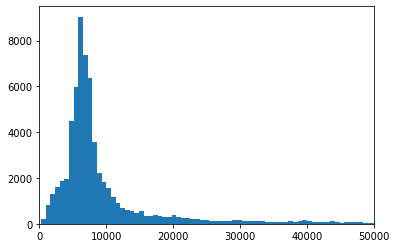

In [18]:
plt.hist(df.lotsizesquarefeet, bins = 10000)
plt.xlim(0, 50000)
plt.show()

### EXERCISE THREE
Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [19]:
# This function needs to be optimized
def describe_missing(df):
    columns = df.columns.to_list()
    num_rows_missing = []
    pct_rows_missing = []
    null_df = pd.DataFrame()
    for column in columns:
        num_rows_missing.append(df[column].isna().sum())
        pct_rows_missing.append(df[column].isna().sum()/df[column].shape[0]*100)
    null_df['attribute'] = columns
    null_df['num_rows_missing'] = num_rows_missing
    null_df['pct_rows_missing'] = pct_rows_missing
    return null_df

In [20]:
describe_missing(df)

,attribute,num_rows_missing,pct_rows_missing
0,id,0,0.000000
1,parcelid,0,0.000000
2,airconditioningtypeid,52427,67.752649
3,architecturalstyletypeid,77174,99.733781
4,basementsqft,77330,99.935384
...,...,...,...
63,buildingclassdesc,77365,99.980615
64,heatingorsystemdesc,27941,36.108814
65,propertylandusedesc,0,0.000000
66,storydesc,77330,99.935384


### EXERCISE FOUR
Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [21]:
# This function is slow, will need to optimize
def missing_columns(df):
    columns = df.columns.to_list()
    nulls_by_row = []
    for i in range(df.shape[0]):
        nulls_by_row.append(df.iloc[i].isna().sum())
    df['null_count'] = nulls_by_row
    df['pct_col_missing'] = df.null_count / len(columns)
    df2 = df.pct_col_missing.value_counts().rename_axis('pct_col_missing').reset_index(name='num_rows')
    df3 = df.null_count.value_counts().rename_axis('num_cols_missing').reset_index(name='num_rows').drop(columns=['num_rows'])
    df = pd.concat([df3, df2], axis = 1)
    return df      

In [22]:
missing_columns(df).sort_values(by=['num_cols_missing'])

,num_cols_missing,pct_col_missing,num_rows
25,23,0.338235,2
21,24,0.352941,13
19,25,0.367647,24
15,26,0.382353,65
11,27,0.397059,316
10,28,0.411765,455
5,29,0.426471,5270
8,30,0.441176,3455
3,31,0.455882,9891
2,32,0.470588,12579


## Prepare
### EXERCISE ONE
Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [23]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,null_count,pct_col_missing
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,36,0.529412
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,33,0.485294
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,34,0.500000
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,32,0.470588
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,29,0.426471


In [24]:
df.propertylandusedesc.isna().sum()

0

In [25]:
df.propertylandusedesc.value_counts()

Single Family Residential                     52319
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [26]:
# Only including land use description that matches single unit properties and minimizes risk of including a non-single unit property
df = df[
    (df.propertylandusedesc == 'Single Family Residential')|
    (df.propertylandusedesc == 'Condominium')|
    (df.propertylandusedesc == 'Planned Unit Development')|
    (df.propertylandusedesc == 'Mobile Home')|
    (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes')|
    (df.propertylandusedesc == 'Residential General')
       ]

In [27]:
# No property has 0 square feet (no vacant lots in current dataframe)
df.calculatedfinishedsquarefeet.describe()

count    73535.000000
mean      1760.793622
std        935.227708
min        128.000000
25%       1171.000000
50%       1524.000000
75%       2077.000000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [28]:
# Removing rows where bedroomcnt == 0
df = df[df.bedroomcnt > 0]

In [29]:
df.shape

(73237, 70)

In [30]:
# No property has 0 lot size
df.lotsizesquarefeet.describe()

count    6.514900e+04
mean     3.096044e+04
std      1.261907e+05
min      2.360000e+02
25%      5.773000e+03
50%      7.283000e+03
75%      1.228700e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

In [31]:
# Removing rows where unitcnt is greater than 1
df = df[~(df.unitcnt > 1)]

In [32]:
df.shape

(73201, 70)

### EXERCISE TWO
Create a function that will drop rows or columns based on the percent of values that are missing: `handle_missing_values(df, prop_required_column, prop_required_row)`.

The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [33]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,null_count,pct_col_missing
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,36,0.529412
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,33,0.485294
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,34,0.500000
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,32,0.470588
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN,29,0.426471


In [34]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [35]:
handle_missing_values(df)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,null_count,pct_col_missing
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,...,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential,36,0.529412
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential,33,0.485294
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential,34,0.500000
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Central,Single Family Residential,32,0.470588
4,1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,...,2016.0,45726.0,1533.89,6.037124e+13,0.006940,2017-01-01,Central,Condominium,29,0.426471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,3.0,3.0,8.0,3.0,1741.0,1741.0,6037.0,3.0,...,2016.0,114000.0,4685.34,6.037132e+13,-0.002245,2017-09-20,Central,Condominium,29,0.426471
77376,673515,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,2.0,...,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Central,Single Family Residential,33,0.485294
77377,2968375,17239384,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,2.0,...,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,NaN,Single Family Residential,32,0.470588
77378,1843709,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,1.0,...,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Central,Single Family Residential,32,0.470588


### EXERCISE THREE
Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [36]:
describe_missing(df)

,attribute,num_rows_missing,pct_rows_missing
0,id,0,0.000000
1,parcelid,0,0.000000
2,bathroomcnt,0,0.000000
3,bedroomcnt,0,0.000000
4,buildingqualitytypeid,26525,36.236339
5,calculatedbathnbr,31,0.042350
6,calculatedfinishedsquarefeet,10,0.013661
7,finishedsquarefeet12,203,0.277322
8,fips,0,0.000000
9,fullbathcnt,31,0.042350


In [37]:
# Create a dictionary to reference later for the decision on each feature
null_plans = {}

### Plan for buildingqualitytypeid

In [38]:
df.buildingqualitytypeid.describe()

count    46675.000000
mean         6.635351
std          1.689899
min          1.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64

(array([1.3000e+01, 1.4900e+02, 8.2150e+03, 1.4960e+03, 1.2858e+04,
        5.9050e+03, 1.4433e+04, 2.2590e+03, 3.0800e+02, 1.0390e+03]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

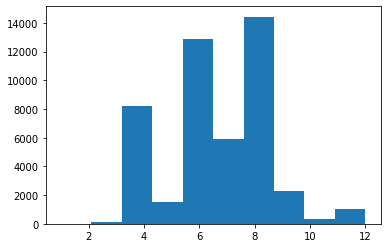

In [39]:
plt.hist(df.buildingqualitytypeid)

Although there is a large number of null values, there is only a small to moderate variance around the mean of 6.63 (std = 1.69). The distribution is roughly symmetrical. The missing values will be imputed with the mean. 

In [40]:
null_plans['buildingqualitytypeid'] = 'mean'

### Plan for calculatedbathnbr

In [41]:
# calculatedbathnbr is unclear what it is actually measuring. It has 31 null values. 
bath_bed_df = df[['bathroomcnt','bedroomcnt','calculatedbathnbr']] 
bath_bed_df

,bathroomcnt,bedroomcnt,calculatedbathnbr
0,3.5,4.0,3.5
1,1.0,2.0,1.0
2,2.0,3.0,2.0
3,3.0,4.0,3.0
4,3.0,3.0,3.0
...,...,...,...
77375,3.0,3.0,3.0
77376,2.0,2.0,2.0
77377,2.0,4.0,2.0
77378,1.0,3.0,1.0


In [42]:
bath_bed_df['test'] = bath_bed_df.min(axis = 1)
bath_bed_df

,bathroomcnt,bedroomcnt,calculatedbathnbr,test
0,3.5,4.0,3.5,3.5
1,1.0,2.0,1.0,1.0
2,2.0,3.0,2.0,2.0
3,3.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0
...,...,...,...,...
77375,3.0,3.0,3.0,3.0
77376,2.0,2.0,2.0,2.0
77377,2.0,4.0,2.0,2.0
77378,1.0,3.0,1.0,1.0


In [43]:
bath_bed_df[bath_bed_df.calculatedbathnbr != bath_bed_df.test]

,bathroomcnt,bedroomcnt,calculatedbathnbr,test
9,3.0,2.0,3.0,2.0
24,3.0,2.0,3.0,2.0
29,3.0,2.0,3.0,2.0
35,3.0,2.0,3.0,2.0
39,2.5,2.0,2.5,2.0
...,...,...,...,...
77301,3.0,2.0,3.0,2.0
77303,2.0,1.0,2.0,1.0
77322,3.0,2.0,3.0,2.0
77327,3.0,2.0,3.0,2.0


#### calculatedbathnbr does not appear to be the minimum between bathroomcnt and bedroomcnt. 

Its possible that `calculatedbathnbr` is derived from some combination of full bathrooms, half bathrooms, or three-quarter bathrooms. Given the lack of clarity on the meaning of this column, the small number of null values, and the presence of data captured in bathroomcnt, `calculatedbathnbr` will be dropped entirely.

In [44]:
null_plans['calculatedbathnbr'] = 'drop'

### Plan for calculatedfinishedsquarefeet

In [45]:
df.calculatedfinishedsquarefeet.describe()

count    73190.000000
mean      1763.282388
std        931.438488
min        152.000000
25%       1174.000000
50%       1526.000000
75%       2079.000000
max      21929.000000
Name: calculatedfinishedsquarefeet, dtype: float64

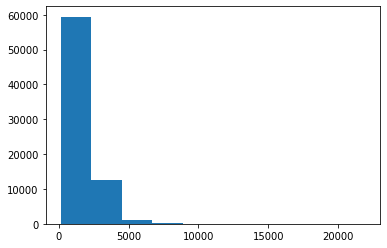

In [46]:
plt.hist(df.calculatedfinishedsquarefeet)
plt.show()

The data appears to be positively skewed. For this reason, the missing values of `calculatedfinishedsquarefeet` will be imputed with the median.

In [47]:
null_plans['calculatedfinishedsquarefeet'] = 'median'

### Plan for finishedsquarefeet12

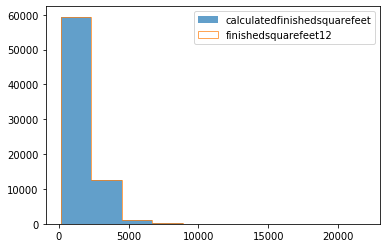

In [48]:
plt.hist(df.calculatedfinishedsquarefeet, alpha=.7, label='calculatedfinishedsquarefeet')
plt.hist(df.finishedsquarefeet12, alpha=.7, histtype='step', label='finishedsquarefeet12')
plt.legend()
plt.show()

Overlay of `finishedsquarefeet12` and `calculatedfinishedsquarefeet` show that they are nearly identical. The relevant characteristic is already captured in `calculatedfinishedsquarefeet`, which has fewer null values. `finishedsquarefeet12` will be dropped.

In [49]:
null_plans['finishedsquarefeet12'] = 'drop'

### Plan for fullbathcnt

In [50]:
(df.fullbathcnt == df.bathroomcnt).mean()

0.8631420765027322

In [51]:
print(df.fullbathcnt.mean(), df.bathroomcnt.mean())

2.2212959040030613 2.2897062841530054


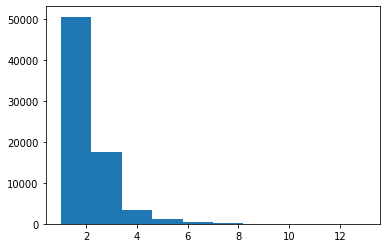

In [52]:
plt.hist(df.fullbathcnt)
plt.show()

`fullbathcnt` shares 86.3% similarity with `bathroomcnt`. `fullbathcnt` is smaller than `bathroomcnt`, which suggests that it does not capture half or three-quarters baths in its value. There are only 31 nulls in this column. Given that the data appears to be positively skewed, missing values for `fullbathcnt` will be imputed by the median of `fullbathcnt`.

In [53]:
null_plans['fullbathcnt'] = 'median'

### Plan for heatingorsystemtypeid/heatingorsystemdesc

In [54]:
df.heatingorsystemdesc.value_counts()

Central       33198
Floor/Wall    13212
Yes             846
Forced air      775
Solar           104
None             59
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [55]:
df.heatingorsystemdesc.isna().sum()

24966

In [56]:
df.heatingorsystemtypeid.value_counts()

2.0     33198
7.0     13212
24.0      846
6.0       775
20.0      104
13.0       59
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64

Given the location of the data (Los Angeles County, Orange County, and Ventura County) it is most likely that the missing values don't represent a lack of a heating system but rather a failure to input information. The missing values for both of these columns will be imputed with their modes (Central/2.0).

In [57]:
null_plans['heatingorsystemtypeid'] = 'mode'
null_plans['heatingorsystemdesc'] = 'mode'

### Plan for lotsizesquarefeet

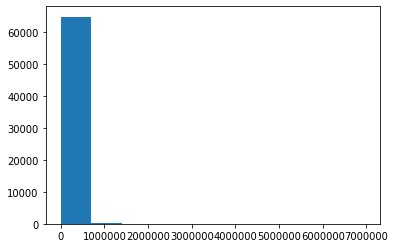

In [58]:
plt.hist(df.lotsizesquarefeet)
plt.show()

In [59]:
df.lotsizesquarefeet.describe()

count    6.511900e+04
mean     3.096281e+04
std      1.262145e+05
min      2.360000e+02
25%      5.773000e+03
50%      7.283000e+03
75%      1.228700e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

It is impossible for a missing value to represent a lot size of zero. Due to the positive skew of the lot size distribution, the missing values will be imputed with the median. 

In [60]:
null_plans['lotsizesquarefeet'] = 'median'

### Plan for propertyzoningdesc

In [61]:
print(df.propertyzoningdesc.value_counts())

LAR1         6503
LAR3         2205
LARS         1387
LBR1N        1143
SCUR2         956
             ... 
PDR17*          1
LCRA81/2        1
LCR12000*       1
SRR3YY          1
ATM1*           1
Name: propertyzoningdesc, Length: 1850, dtype: int64


The property zoning description has a large number of categorical values. One-hot encoding would result in an substantial increase in the number of features for any future modeling. These zoning descriptions can represent significantly different situations, therefore imputing these values is not recommended. This column will be dropped. 

In [62]:
null_plans['propertyzoningdesc'] = 'drop'

### Plan for regionidcity

In [63]:
df.regionidcity.value_counts()

12447.0     16277
46298.0      2300
54311.0      1879
5534.0       1870
52650.0      1663
            ...  
118880.0        5
10815.0         4
13311.0         4
21395.0         1
36078.0         1
Name: regionidcity, Length: 175, dtype: int64

Similar to propertyzoningdesc, these categorical values can represent significantly different characteristics and aren't simple to impute. Rather than losing the rows that have missing values for this feature, this column will be removed, as there are other similar features providing geographical information. 

In [64]:
null_plans['regionidcity'] = 'drop'

### Plan for roomcnt
Although `roomcnt` appears to have no null values, inspection of the `value_counts()` tells us otherwise:

In [65]:
df.roomcnt.value_counts()

0.0     55992
6.0      4429
7.0      3815
5.0      2891
8.0      2864
4.0      1305
9.0      1190
10.0      339
3.0       206
11.0      108
12.0       34
13.0       10
2.0         9
14.0        6
15.0        1
1.0         1
Name: roomcnt, dtype: int64

It is nonsensical to have a property with 0 rooms, which means that these zeroes represent null values. Because such a large proportion of these are effectively null, the entire column will be dropped.

In [66]:
null_plans['roomcnt'] = 'drop'

### Plan for unitcnt
Efforts have been made to establish single unit properties without the use of the unitcnt variable. Now that unitcnt has been used to eliminate a small number of multiple unit properties, it is no longer necessary to maintain, as the entirety of our investigation is solely based on single unit properties. This column will be dropped.

In [67]:
null_plans['unitcnt'] = 'drop'

### Plan for yearbuilt

In [68]:
df.yearbuilt.describe()

count    73159.000000
mean      1969.828661
std         23.092326
min       1878.000000
25%       1954.000000
50%       1971.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64

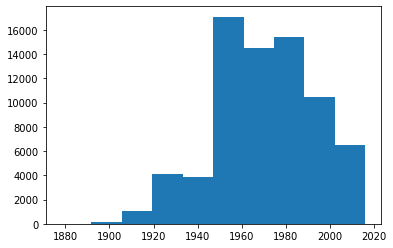

In [69]:
plt.hist(df.yearbuilt)
plt.show()

`yearbuilt` mean and median are quite close to each other. The data is somewhat normally distributed. `yearbuilt` will be imputed with the mean.

In [70]:
null_plans['yearbuilt'] = 'mean'

### Plan for structuretaxvaluedollarcnt


In [71]:
df.structuretaxvaluedollarcnt.describe()

count    7.312700e+04
mean     1.898467e+05
std      2.264688e+05
min      4.400000e+01
25%      8.449000e+04
50%      1.367940e+05
75%      2.191745e+05
max      9.164901e+06
Name: structuretaxvaluedollarcnt, dtype: float64

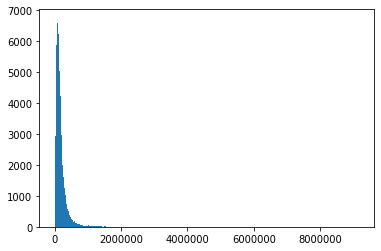

In [72]:
plt.hist(df.structuretaxvaluedollarcnt, bins = 500)
plt.show()

Because the mean is being increased due to positive skew, values for `structuretaxvaluedollarcnt` will be imputed with the median.

In [73]:
null_plans['structuretaxvaluedollarcnt'] = 'median'

### Plans for taxvaluedollarcnt

In [74]:
df.taxvaluedollarcnt.describe()

count    7.319900e+04
mean     4.902220e+05
std      6.295982e+05
min      1.000000e+03
25%      2.070060e+05
50%      3.603010e+05
75%      5.695440e+05
max      2.538125e+07
Name: taxvaluedollarcnt, dtype: float64

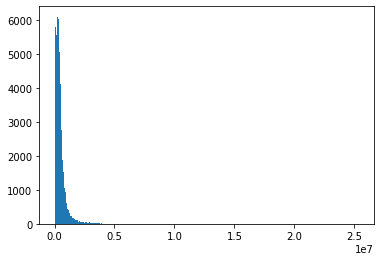

In [75]:
plt.hist(df.taxvaluedollarcnt, bins = 500)
plt.show()

Because the mean is being increased due to positive skew, values for `taxvaluedollarcnt` will be imputed with the median. `landtaxvaluedollarcnt` is similar and will be handled in an identical fashion.

In [76]:
null_plans['taxvaluedollarcnt'] = 'median'
null_plans['landtaxvaluedollarcnt'] = 'median'

### Plan for taxamount

In [77]:
df.taxamount.describe()

count     73195.000000
mean       5987.560831
std        7328.440587
min          19.920000
25%        2714.135000
50%        4452.150000
75%        6925.485000
max      290998.060000
Name: taxamount, dtype: float64

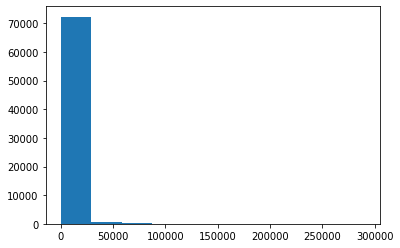

In [78]:
plt.hist(df.taxamount)
plt.show()

Because the mean is being increased due to positive skew, values for `taxamount` will be imputed with the median.

In [79]:
null_plans['taxamount'] = 'median'

### Plan for censustractandblock

This data is unique to each entry and cannot be imputed. It would be akin to imputing a person's name. There are not many null values, so rather than eliminating the column to handle the nulls, individual rows missing these values will be dropped.

In [80]:
null_plans['censustractandblock'] = 'drop row'

### Plan for null_count/pct_col_missing
These are derived values and should not be passed on to the data split. They were used during data preparation and will be dropped accordingly.

In [81]:
null_plans['null_count'] = 'drop'
null_plans['pct_col_missing'] = 'drop'

In [82]:
null_plans

{'buildingqualitytypeid': 'mean',
 'calculatedbathnbr': 'drop',
 'calculatedfinishedsquarefeet': 'median',
 'finishedsquarefeet12': 'drop',
 'fullbathcnt': 'median',
 'heatingorsystemtypeid': 'mode',
 'heatingorsystemdesc': 'mode',
 'lotsizesquarefeet': 'median',
 'propertyzoningdesc': 'drop',
 'regionidcity': 'drop',
 'roomcnt': 'drop',
 'unitcnt': 'drop',
 'yearbuilt': 'mean',
 'structuretaxvaluedollarcnt': 'median',
 'taxvaluedollarcnt': 'median',
 'landtaxvaluedollarcnt': 'median',
 'taxamount': 'median',
 'censustractandblock': 'drop row',
 'null_count': 'drop',
 'pct_col_missing': 'drop'}

In [83]:
df.drop(columns=['calculatedbathnbr', 'finishedsquarefeet12', 'propertyzoningdesc', 'regionidcity', 'roomcnt', 'unitcnt', 'null_count', 'pct_col_missing'], inplace=True)
df = df.dropna(subset=['censustractandblock'])
df = df.dropna(subset=['regionidzip'])
df.shape

(72971, 28)

In [84]:
describe_missing(df)

,attribute,num_rows_missing,pct_rows_missing
0,id,0,0.000000
1,parcelid,0,0.000000
2,bathroomcnt,0,0.000000
3,bedroomcnt,0,0.000000
4,buildingqualitytypeid,26410,36.192460
5,calculatedfinishedsquarefeet,10,0.013704
6,fips,0,0.000000
7,fullbathcnt,31,0.042483
8,heatingorsystemtypeid,24859,34.066958
9,latitude,0,0.000000


#### The dataframe is ready for be assessed for outliers.

## Working with Outliers
Many of the continuous variables in this data set appear to have significant upper outliers. Where there is skew, it tends to be substantial. Outliers will be identified for each feature.

In [85]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72971 entries, 0 to 77379
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72971 non-null  int64  
 1   parcelid                      72971 non-null  int64  
 2   bathroomcnt                   72971 non-null  float64
 3   bedroomcnt                    72971 non-null  float64
 4   buildingqualitytypeid         46561 non-null  float64
 5   calculatedfinishedsquarefeet  72961 non-null  float64
 6   fips                          72971 non-null  float64
 7   fullbathcnt                   72940 non-null  float64
 8   heatingorsystemtypeid         48112 non-null  float64
 9   latitude                      72971 non-null  float64
 10  longitude                     72971 non-null  float64
 11  lotsizesquarefeet             65054 non-null  float64
 12  propertycountylandusecode     72971 non-null  object 
 13  p

Before we can apply our function, we need to be sure that object type categorical variables are not encoded as numeric.

In [87]:
columns_to_change = ['id', 'parcelid', 'fips', 'heatingorsystemtypeid', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcounty', 'regionidzip', 'censustractandblock']
for column in columns_to_change:
    df[column] = df[column].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72971 entries, 0 to 77379
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72971 non-null  object 
 1   parcelid                      72971 non-null  object 
 2   bathroomcnt                   72971 non-null  float64
 3   bedroomcnt                    72971 non-null  float64
 4   buildingqualitytypeid         46561 non-null  float64
 5   calculatedfinishedsquarefeet  72961 non-null  float64
 6   fips                          72971 non-null  object 
 7   fullbathcnt                   72940 non-null  float64
 8   heatingorsystemtypeid         48112 non-null  object 
 9   latitude                      72971 non-null  float64
 10  longitude                     72971 non-null  float64
 11  lotsizesquarefeet             65054 non-null  float64
 12  propertycountylandusecode     72971 non-null  object 
 13  p

In [88]:
df2 = add_upper_outlier_columns(df, 6.0)

outlier_cols = [col for col in df2 if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df2[col][df2[col] > 0]
    print(data.describe())

~~~
bathroomcnt_outliers
count    9.000000
mean     1.666667
std      1.000000
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      4.000000
Name: bathroomcnt_outliers, dtype: float64
~~~
bedroomcnt_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: bedroomcnt_outliers, dtype: float64
~~~
buildingqualitytypeid_outliers
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: buildingqualitytypeid_outliers, dtype: float64
~~~
calculatedfinishedsquarefeet_outliers
count      132.000000
mean      1891.068182
std       2161.551331
min         25.000000
25%        586.750000
50%       1281.000000
75%       2449.500000
max      14434.000000
Name: calculatedfinishedsquarefeet_outliers, dtype: float64
~~~
fullbathcnt_outliers
count    9.000000
mean     1.666667
std      1.000000
min      1.000000
25%      1.000000
50%      1.000000
75%      2.0000

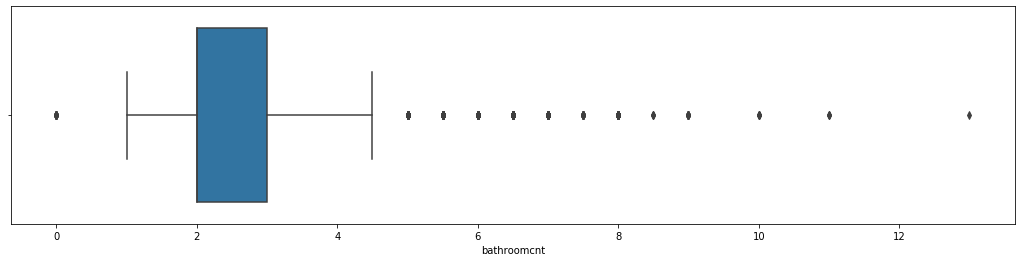

In [89]:
plt.figure(figsize=(18, 4))
sns.boxplot(data=df, x='bathroomcnt') # 9 upper outliers at 6 * IQR

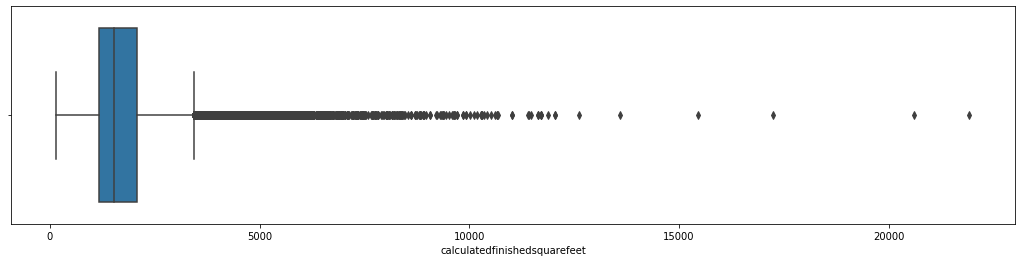

In [90]:
plt.figure(figsize=(18, 4))
sns.boxplot(data=df, x='calculatedfinishedsquarefeet') # 132 upper outliers at 6 * IQR

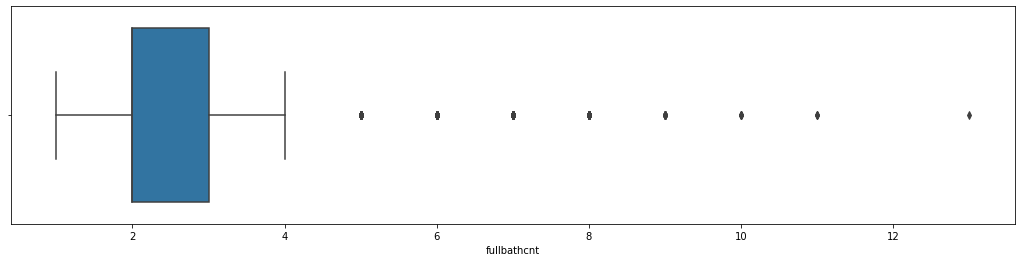

In [91]:
plt.figure(figsize=(18, 4))
sns.boxplot(data=df, x = 'fullbathcnt') # 9 upper outliers at 6 * IQR

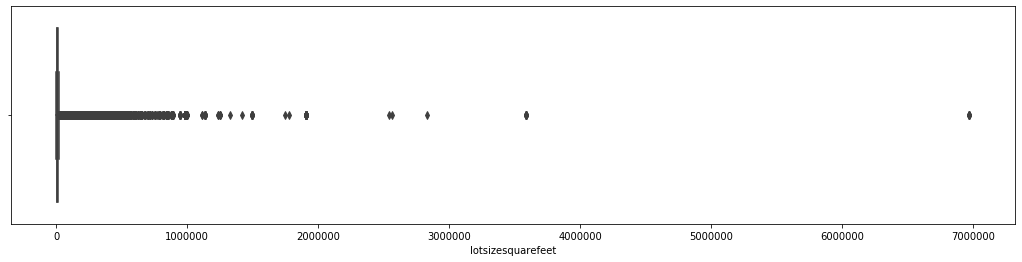

In [92]:
plt.figure(figsize=(18, 4))
sns.boxplot(data = df, x='lotsizesquarefeet') #6510 upper outliers at 6 * IQR

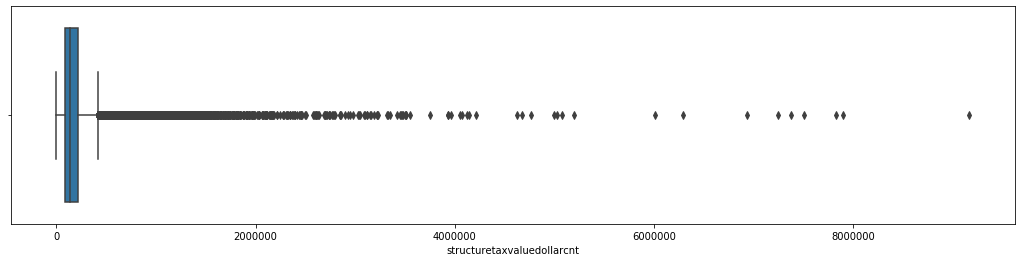

In [93]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='structuretaxvaluedollarcnt') #759 upper outliers at 6 * IQR

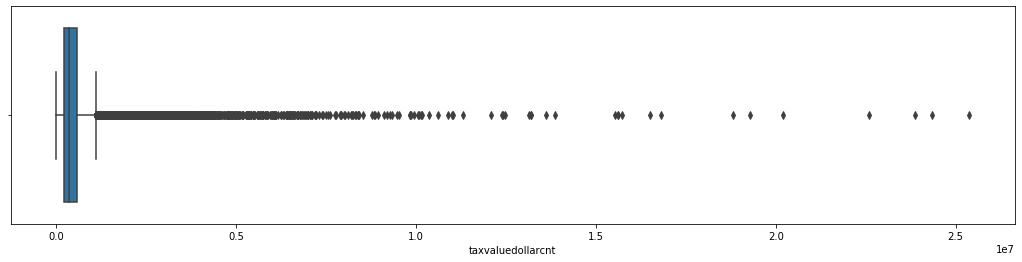

In [94]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='taxvaluedollarcnt') #736 upper outliers at 6 * IQR

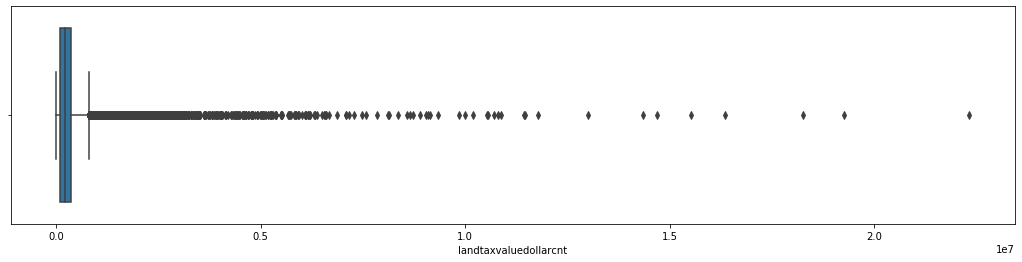

In [95]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='landtaxvaluedollarcnt') #587 upper outliers at 6 * IQR

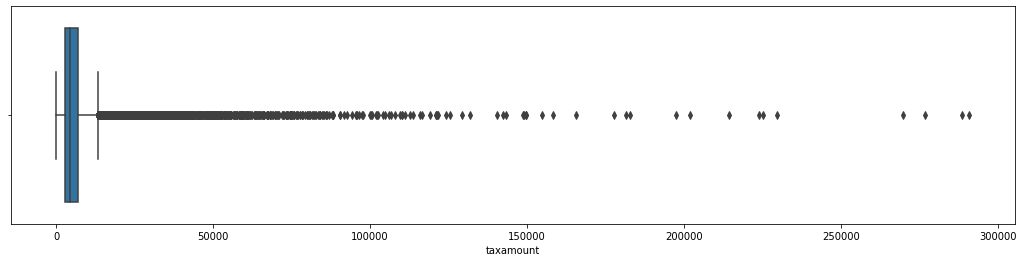

In [96]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='taxamount') #716 upper outliers at 6 * IQR

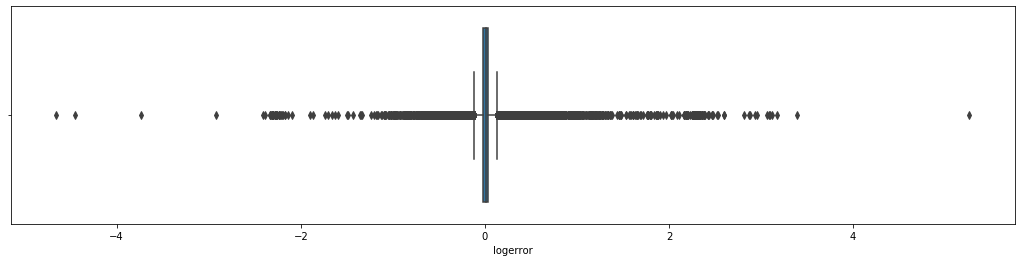

In [97]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='logerror') #1016 upper outliers at 6 * IQR

#### Takeaways:
`lotsizesquarefeet` has the greatest number of outliers  
`logerror` is the only feature that has negative outliers, but this is because these values are not tied to the property itself. These values are the result of a previous model applied to the data. 

We could consider dropping the rows that contain these outliers, but for the time being we will keep them. We may remove them in the future to potentially improve any models that we develop from this data.

A function to impute the mean, median, and modes of columns that still contain missing values is in the wrangle_zillow.py file. 